In [575]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [576]:
# chargement du dataset
df=pd.read_csv("mouse_viral_study.csv")

In [577]:
df.head()

,Med_1_mL,Med_2_mL,VIRUS
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


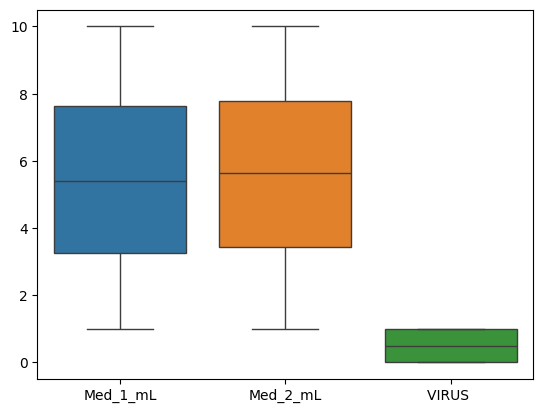

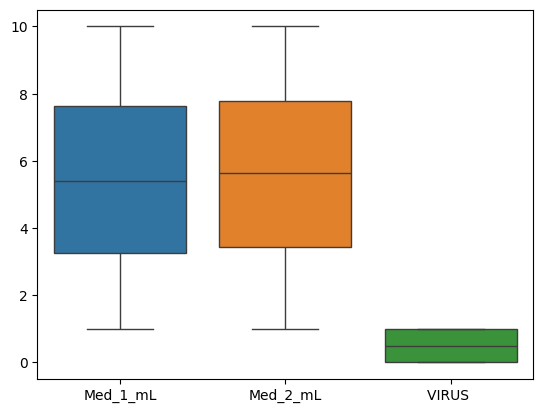

In [578]:
# Ce code crée un boxplot pour chaque colonne numérique dans le DataFrame 'df'.
# Un boxplot (ou boîte à moustaches) montre la distribution de données quantitatives de manière à faciliter 
# les comparaisons entre les variables ou à travers les niveaux d'une variable catégorielle. 
# La boîte montre les quartiles du jeu de données tandis que les moustaches s'étendent pour montrer le reste de la distribution, 
# à l'exception des points qui sont déterminés comme étant des "valeurs aberrantes" en utilisant une méthode qui est une fonction de l'écart interquartile.
# 'sns.boxplot(data=df)' crée les boxplots et 'plt.show()' les affiche.
sns.boxplot(data=df)
plt.show()
sns.boxplot(data=df)
plt.show()

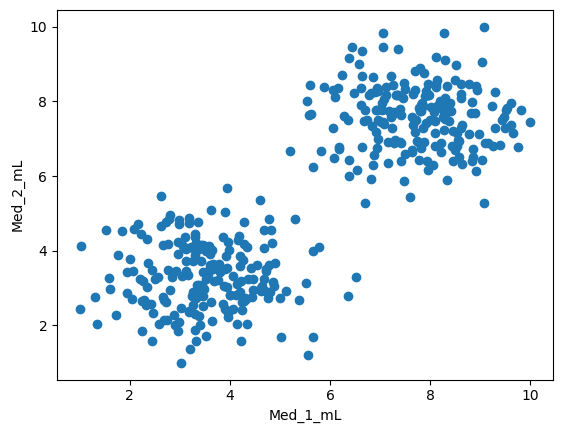

In [579]:
plt.plot(df["Med_2_mL"],df["Med_1_mL"],'o')
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
plt.show()

In [580]:
X=df['Med_1_mL']
y=df['Med_2_mL']

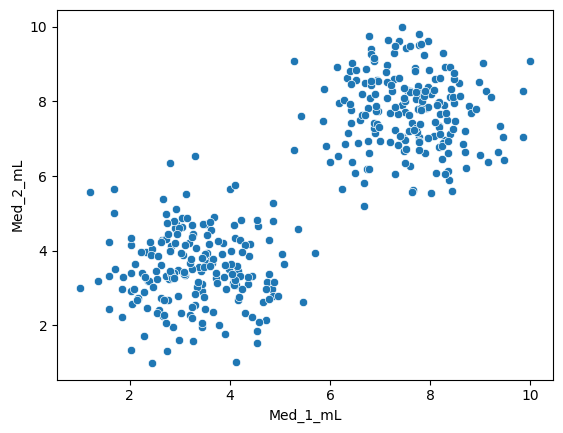

In [581]:
sns.scatterplot(x=X, y=y)
plt.show()

In [582]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=np.array(X_train).reshape(-1, 1)
X_train.shape

(320, 1)

In [583]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Define maximum polynomial degree
max_degree = 20

# Initialize lists to store BIC values and models
bic_values = []
models = []

# Loop over polynomial degrees
for degree in range(1, max_degree+1):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    
    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Compute number of parameters
    num_params = X_train_poly.shape[1]
    
    # Compute log-likelihood
    y_train_pred = model.predict(X_train_poly)
    log_likelihood = -0.5 * len(X_train) * np.log(mean_squared_error(y_train, y_train_pred))
    
    # Compute BIC
    bic = -2 * log_likelihood + num_params * np.log(len(X_train))
    
    # Append BIC value and model
    bic_values.append(bic)
    models.append(model)

# Find index of model with lowest BIC
best_model_idx = np.argmin(bic_values)
best_model = models[best_model_idx]
best_degree = best_model_idx + 1

print(f"Best polynomial degree: {best_degree}")



Best polynomial degree: 9


In [584]:
from sklearn.preprocessing import PolynomialFeatures

In [585]:
# Create the polynomial features matrix
def create_polynomial_features(X, degree):
    #X_poly = np.ones((len(X), degree + 1))
    X_poly = np.zeros((len(X), degree))
    for i in range(degree):
        X_poly[:, i] = X ** (i + 1)
    return X_poly

X=create_polynomial_features(X, 20)
X.shape


(400, 20)

In [586]:
print(X)

[[6.50823109e+00 4.23570720e+01 2.75669613e+02 ... 4.38867456e+14
  2.85625082e+15 1.85891404e+16]
 [4.12611616e+00 1.70248346e+01 7.02464450e+01 ... 1.20156177e+11
  4.95778344e+11 2.04563904e+12]
 [6.42787048e+00 4.13175189e+01 2.65583660e+02 ... 3.50919991e+14
  2.25566825e+15 1.44991434e+16]
 ...
 [7.89532511e+00 6.23361586e+01 4.92164238e+02 ... 1.42121677e+16
  1.12209684e+17 8.85931939e+17]
 [2.69059196e+00 7.23928509e+00 1.94779623e+01 ... 5.46086096e+07
  1.46929486e+08 3.95327293e+08]
 [7.58782061e+00 5.75750216e+01 4.36868936e+02 ... 6.95195555e+15
  5.27501916e+16 4.00258991e+17]]


In [587]:
print(y.shape)
y = y.values.reshape(-1, 1)
# La ligne suivante affiche la forme de la matrice 'y', c'est-à-dire le nombre de lignes et de colonnes.
y.shape

(400,)


(400, 1)

In [588]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(320, 20)
(320, 1)
(80, 20)
(80, 1)


In [589]:
#La normalisation du score Z est une technique utilisée pour mettre à l'échelle les valeurs
# de chaque caractéristique d'un ensemble de données afin d'avoir une moyenne de 0 et 
# un écart type de 1.

def z_score_normalization(data):
    """
    Normalise les caractéristiques d'un ensemble de données en utilisant la méthode Z-score.

    Args:
    - data : un tableau NumPy contenant les données à normaliser. Chaque colonne représente une caractéristique.

    Returns:
    - data_normalized : le tableau NumPy contenant les données normalisées.
    - mean : le tableau NumPy contenant les moyennes de chaque caractéristique avant normalisation.
    - std : le tableau NumPy contenant les déviations standard de chaque caractéristique avant normalisation.
    """
    # Calcul des moyennes et des déviations standard de chaque caractéristique
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    # Normalisation des données en utilisant la méthode Z-score
    data_normalized = (data - mean) / std

    return data_normalized

In [590]:
X_train=z_score_normalization(X_train)
X_test=z_score_normalization(X_test)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))


In [591]:
print(X_test.shape)
print(X_train.shape)

(80, 21)
(320, 21)


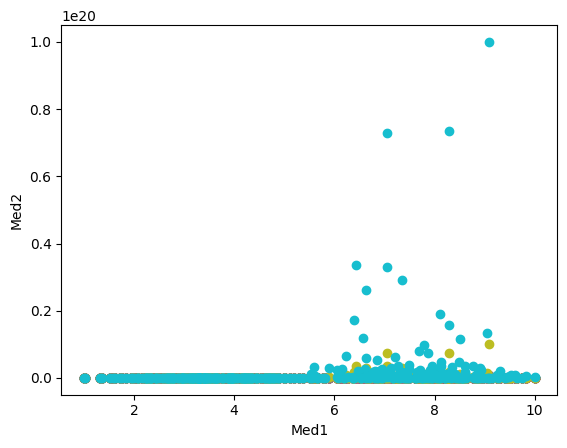

In [592]:
plt.plot(y,X,'o')
plt.xlabel('Med1')
plt.ylabel('Med2')
plt.show()

In [593]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(X_train.shape[1],1)
print('Theta:',theta)

Theta: [[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]
 [ 0.14404357]
 [ 1.45427351]
 [ 0.76103773]
 [ 0.12167502]
 [ 0.44386323]
 [ 0.33367433]
 [ 1.49407907]
 [-0.20515826]
 [ 0.3130677 ]
 [-0.85409574]
 [-2.55298982]]


# La régularisation L1- LASSO

In [594]:
def model(X, theta):
    return np.dot(X, theta)

In [595]:
def cost_function(X, y, theta,a):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) + a/m * np.linalg.norm(theta, ord=1)


In [596]:
def grad(X, y, theta, a):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y) + a/m * theta *np.sign(theta)

In [597]:
def gradient_descent(X, y, theta, learning_rate, n_iterations, a):
    cost_history = np.zeros(n_iterations)

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta, a)
        cost_history[i] = cost_function(X, y, theta, a)

    return theta[:, 0].reshape(-1, 1), cost_history

In [598]:
cost_function(X_train, y_train, theta,0.001)

72.95499799908355

In [599]:
# Entrainement du modèle
n_iterations = 10000
learning_rate = 0.1

theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations,1)

In [600]:
theta_final

array([[-2.55994658],
       [ 2.41632168],
       [ 3.11983586],
       [ 3.3164028 ],
       [ 3.11335717],
       [-3.82449758],
       [ 2.45051309],
       [-6.67815166],
       [-8.01625107],
       [ 1.64128347],
       [ 1.25820102],
       [ 1.74724016],
       [ 1.64677031],
       [ 1.53164306],
       [ 1.49204814],
       [ 1.41677246],
       [ 1.40051594],
       [ 1.26194263],
       [ 1.23549755],
       [-5.99482587],
       [ 5.56605242]])

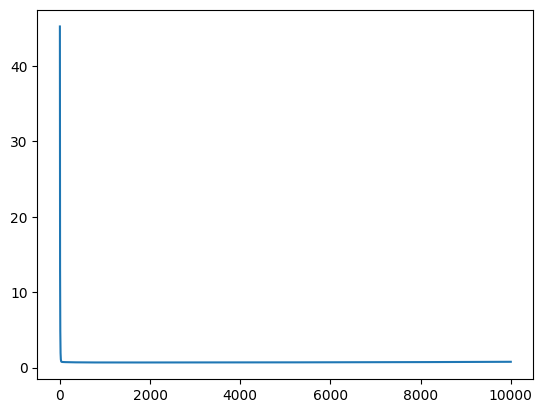

In [601]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [602]:
predictions_test = model(X_test, theta_final)
predictions_train = model(X_train, theta_final)

In [603]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v


In [604]:
coef_determination(y_test, predictions_test)

0.6802223678896868

In [605]:
coef_determination(y_train, predictions_train)

0.7907156119024135

# La régularisation L2- RIDGE

In [606]:
def cost_function__(X, y, theta,a):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) + a/(2*m) * np.sum(theta[0:len(theta)-1]**2)

def grad__(X, y, theta,a):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y) + a/m * theta 

def gradient_descent__(X, y, theta, learning_rate, n_iterations, a):
    cost_history = np.zeros(n_iterations)

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad__(X, y, theta, a)
        cost_history[i] = cost_function__(X, y, theta, a)

    return theta[:, 0].reshape(-1, 1), cost_history

In [607]:
theta_final, cost_history = gradient_descent__(X_train, y_train, theta, learning_rate, n_iterations,1)
predictions_test = model(X_test, theta_final)
predictions_train = model(X_train, theta_final)

In [608]:
coef_determination(y_test, predictions_test)

0.6619557916263891

In [609]:
coef_determination(y_train, predictions_train)

0.7811101032085317